# **2. EDA and Feature Engineering**

## *Table of Contents*

1. [Data Cleaning](../01_Data_Cleaning/1_Data_Cleaning.ipynb)
2. [**EDA and Feature Engineering**](./2_Exploratory_Data_Analysis.ipynb)
3. [Regression Modeling](../03_Regression_Models/3_Regression_Modeling.ipynb)
4. [Time Series](../04_Time_Series_Analysis/4_Time_Series.ipynb)

## **Library Imports**

### Standard library imports

In [1]:
import sys # Provides a way of using operating system dependent functionality
import os  # For interacting with the operating system
from itertools import combinations

### Third-party imports

In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For scientific computing and array objects
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For data visualization based on matplotlib
from scipy import stats  # For scientific and technical computing
from sklearn.preprocessing import MinMaxScaler  # For feature scaling
from scipy.stats import chi2_contingency

### Local application imports

In [3]:
# Define the absolute path of the parent directory of the script's grandparent directory
# This is useful for module importation from a different directory structure
parent_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, parent_dir)

# Local application imports
from utils import plot_utils, func_utils

## **File Importation**

In [4]:
# Determine the absolute path to the directory containing the current script
script_dir = os.path.dirname(os.getcwd())

# Construct the path to the data file
data_path = os.path.join(script_dir, '01_Data_Cleaning', '1_cleaned_melb_data.csv')

# Load dataset containing cleaned Melbourne housing data
melb_data = pd.read_csv(data_path)

## **Analysis**

In [6]:
# Define quantitative and categorical columns for subsequent analysis
quan_columns = ['Price', 'Bedroom', 'Bathroom', 'Car', 'Distance', 'Landsize', 'BuildingArea']
cat_columns = ['Postcode', 'Suburb', 'Regionname', 'CouncilArea', 'Type', 'SellerG', 'Method', 'Year', 'Month']

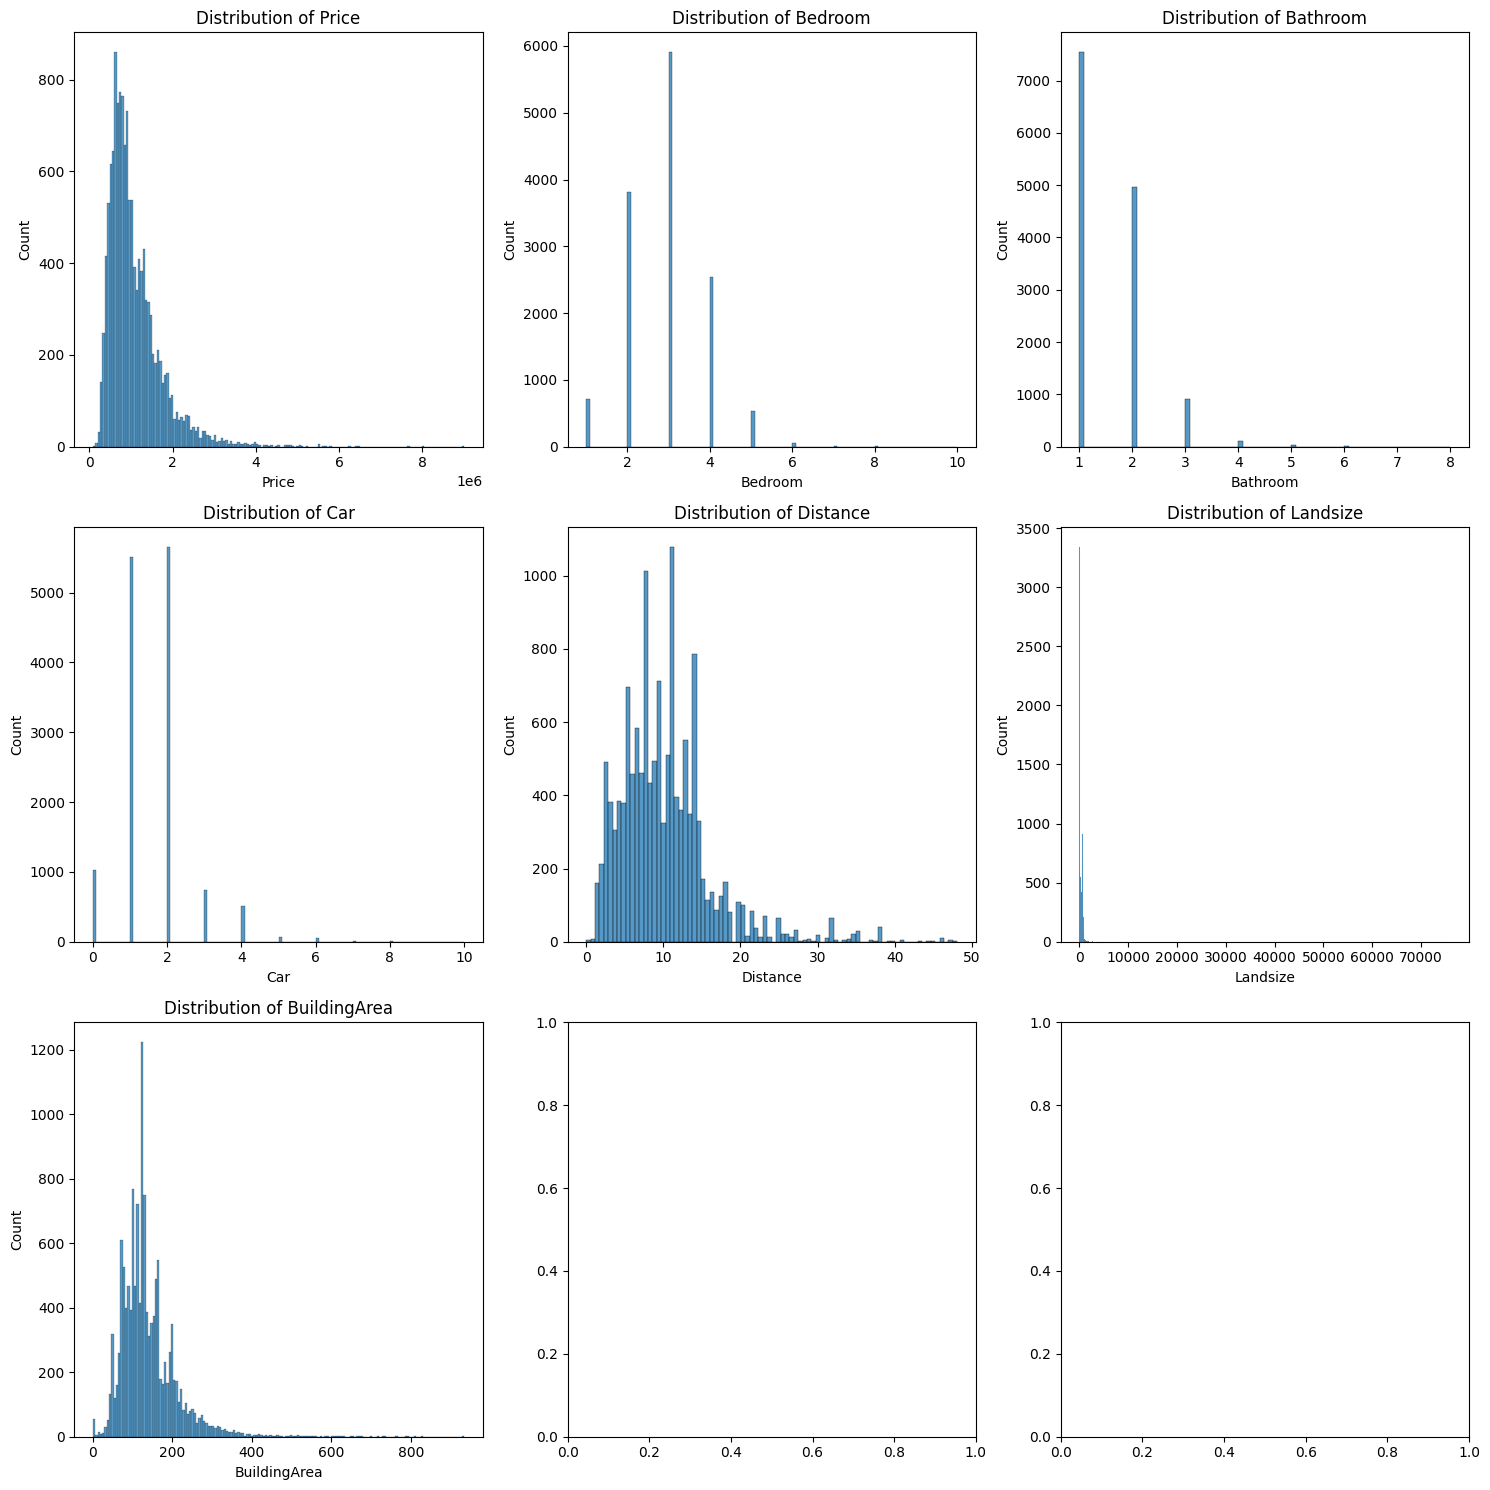

In [7]:
# Plot histograms for quantitative columns in 'melb_data' across a 3x3 grid.
plot_utils.plot_hist(data=melb_data, column_list=quan_columns, rows=3, cols=3)

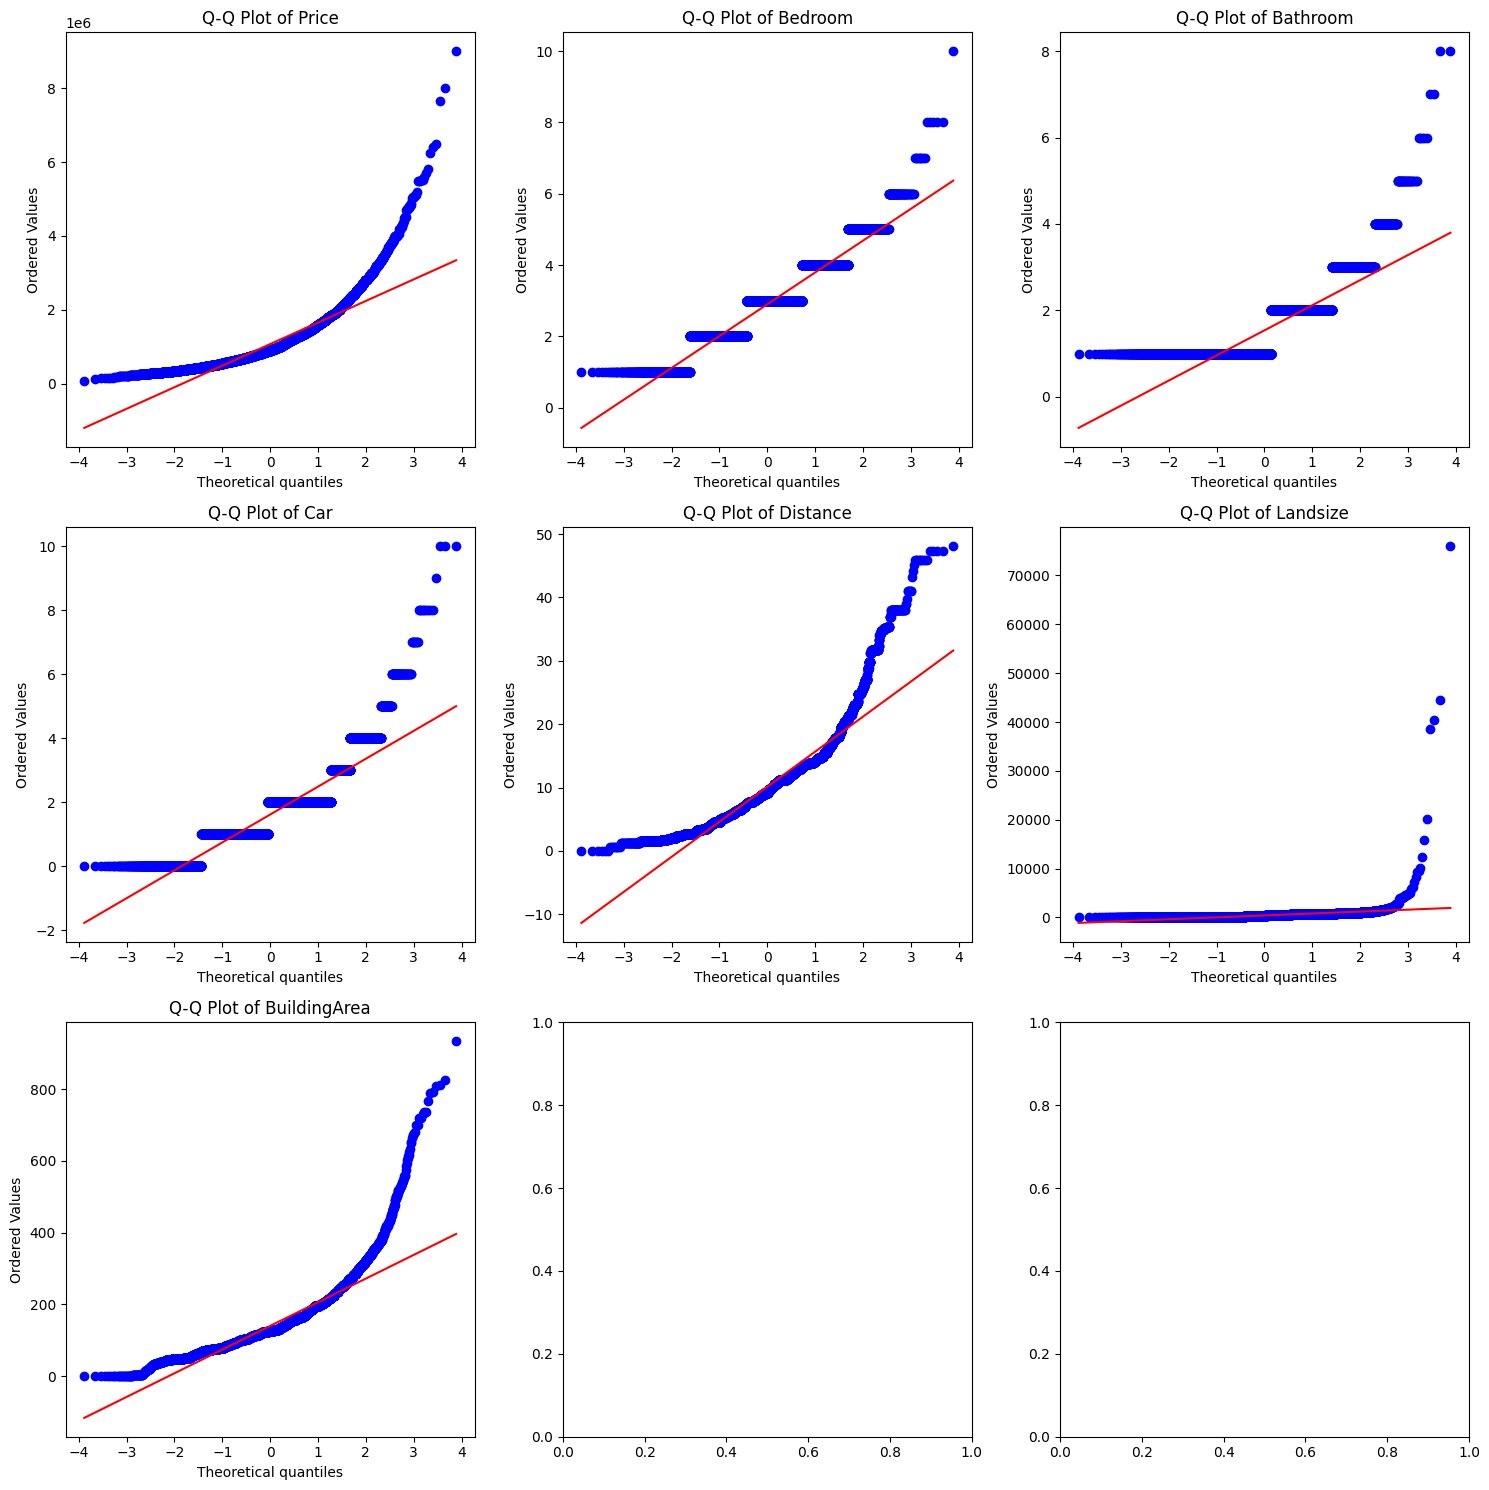

In [8]:
# Generate Q-Q plots for quantitative columns in 'melb_data' on a 3x3 grid.
plot_utils.plot_qq(data=melb_data, column_list=quan_columns, rows=3, cols=3)

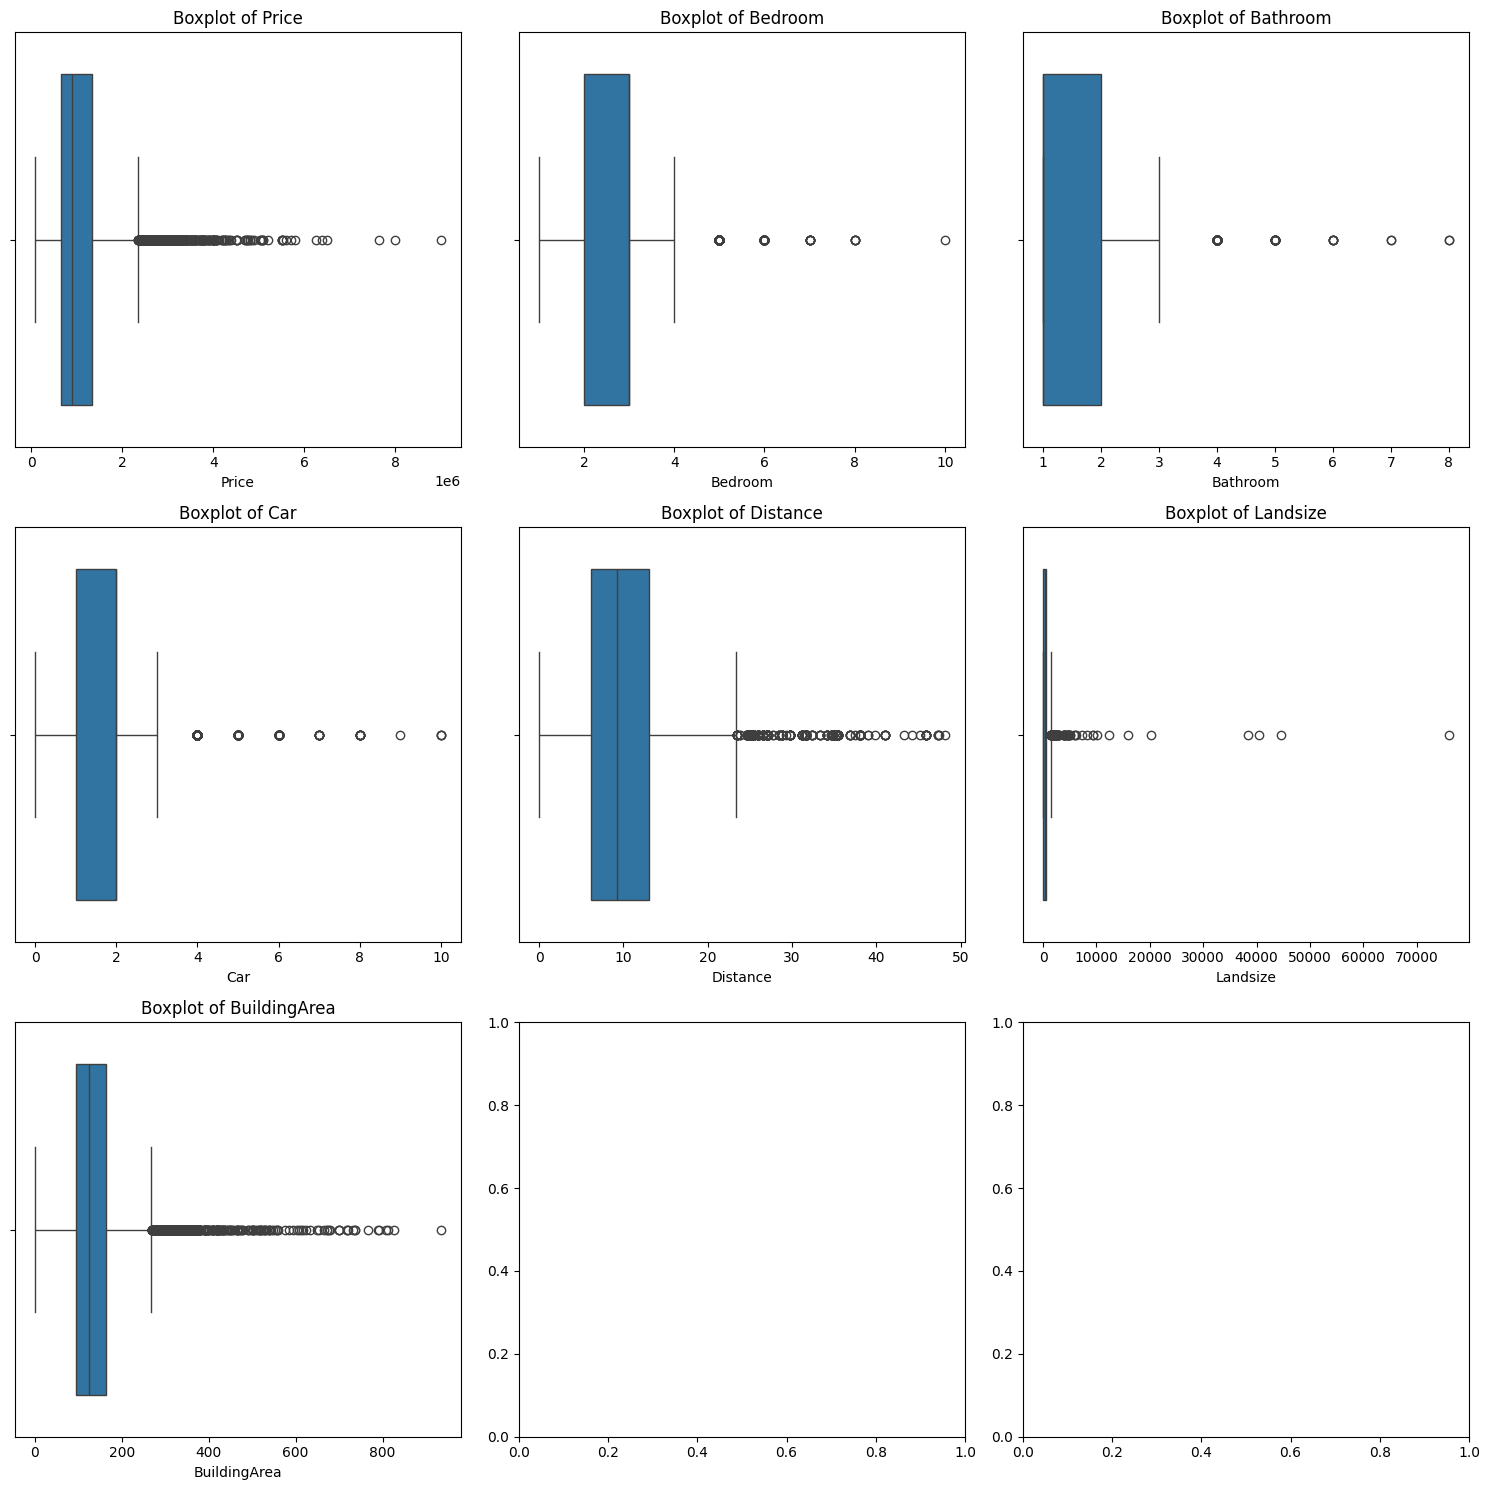

In [9]:
# Create box plots for quantitative columns in 'melb_data' arranged in a 3x3 grid.
plot_utils.plot_box(data=melb_data, column_list=quan_columns, rows=3, cols=3)

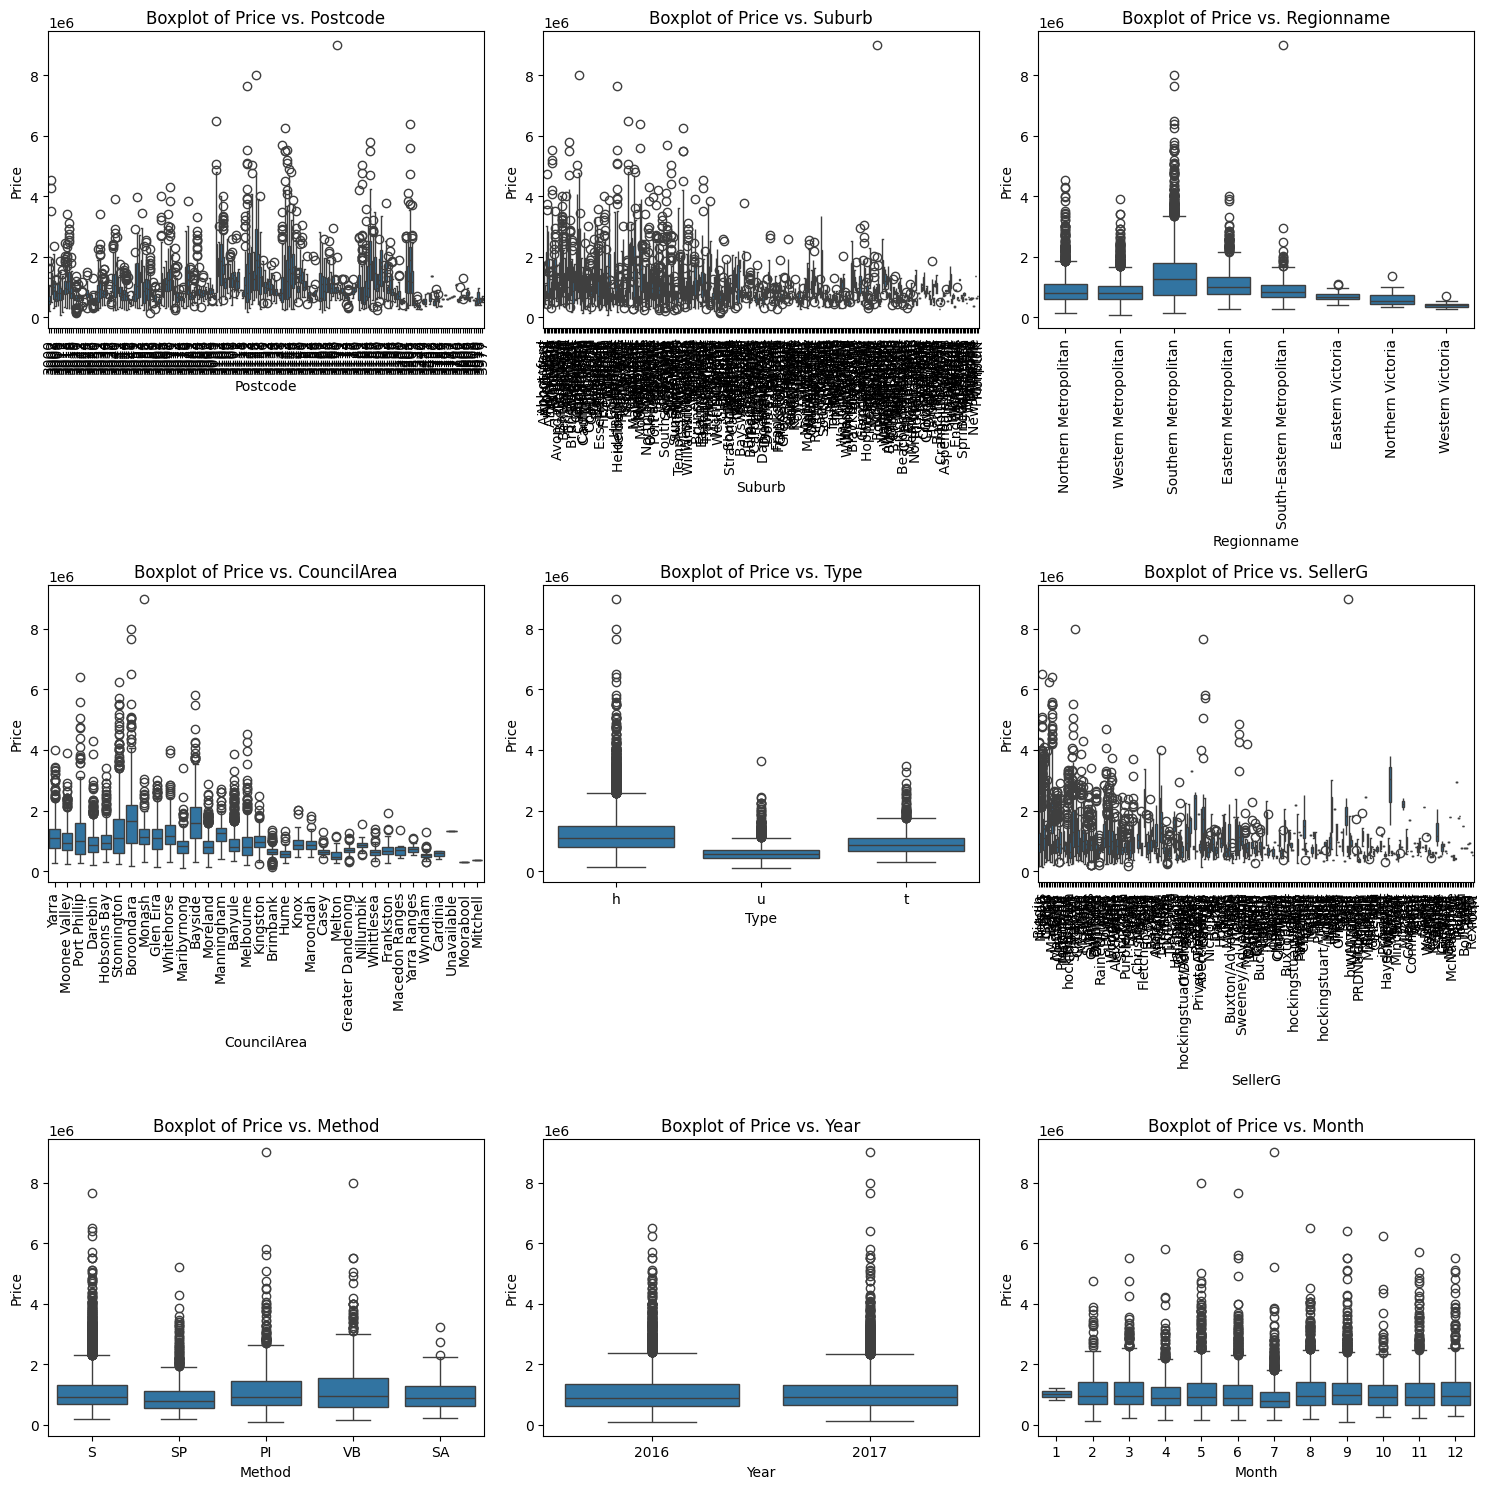

In [10]:
# Plot box plots for categorical columns in 'melb_data' with price consideration over a 3x3 grid.
plot_utils.plot_box(data=melb_data, column_list=cat_columns, price=True, rows=3, cols=3)

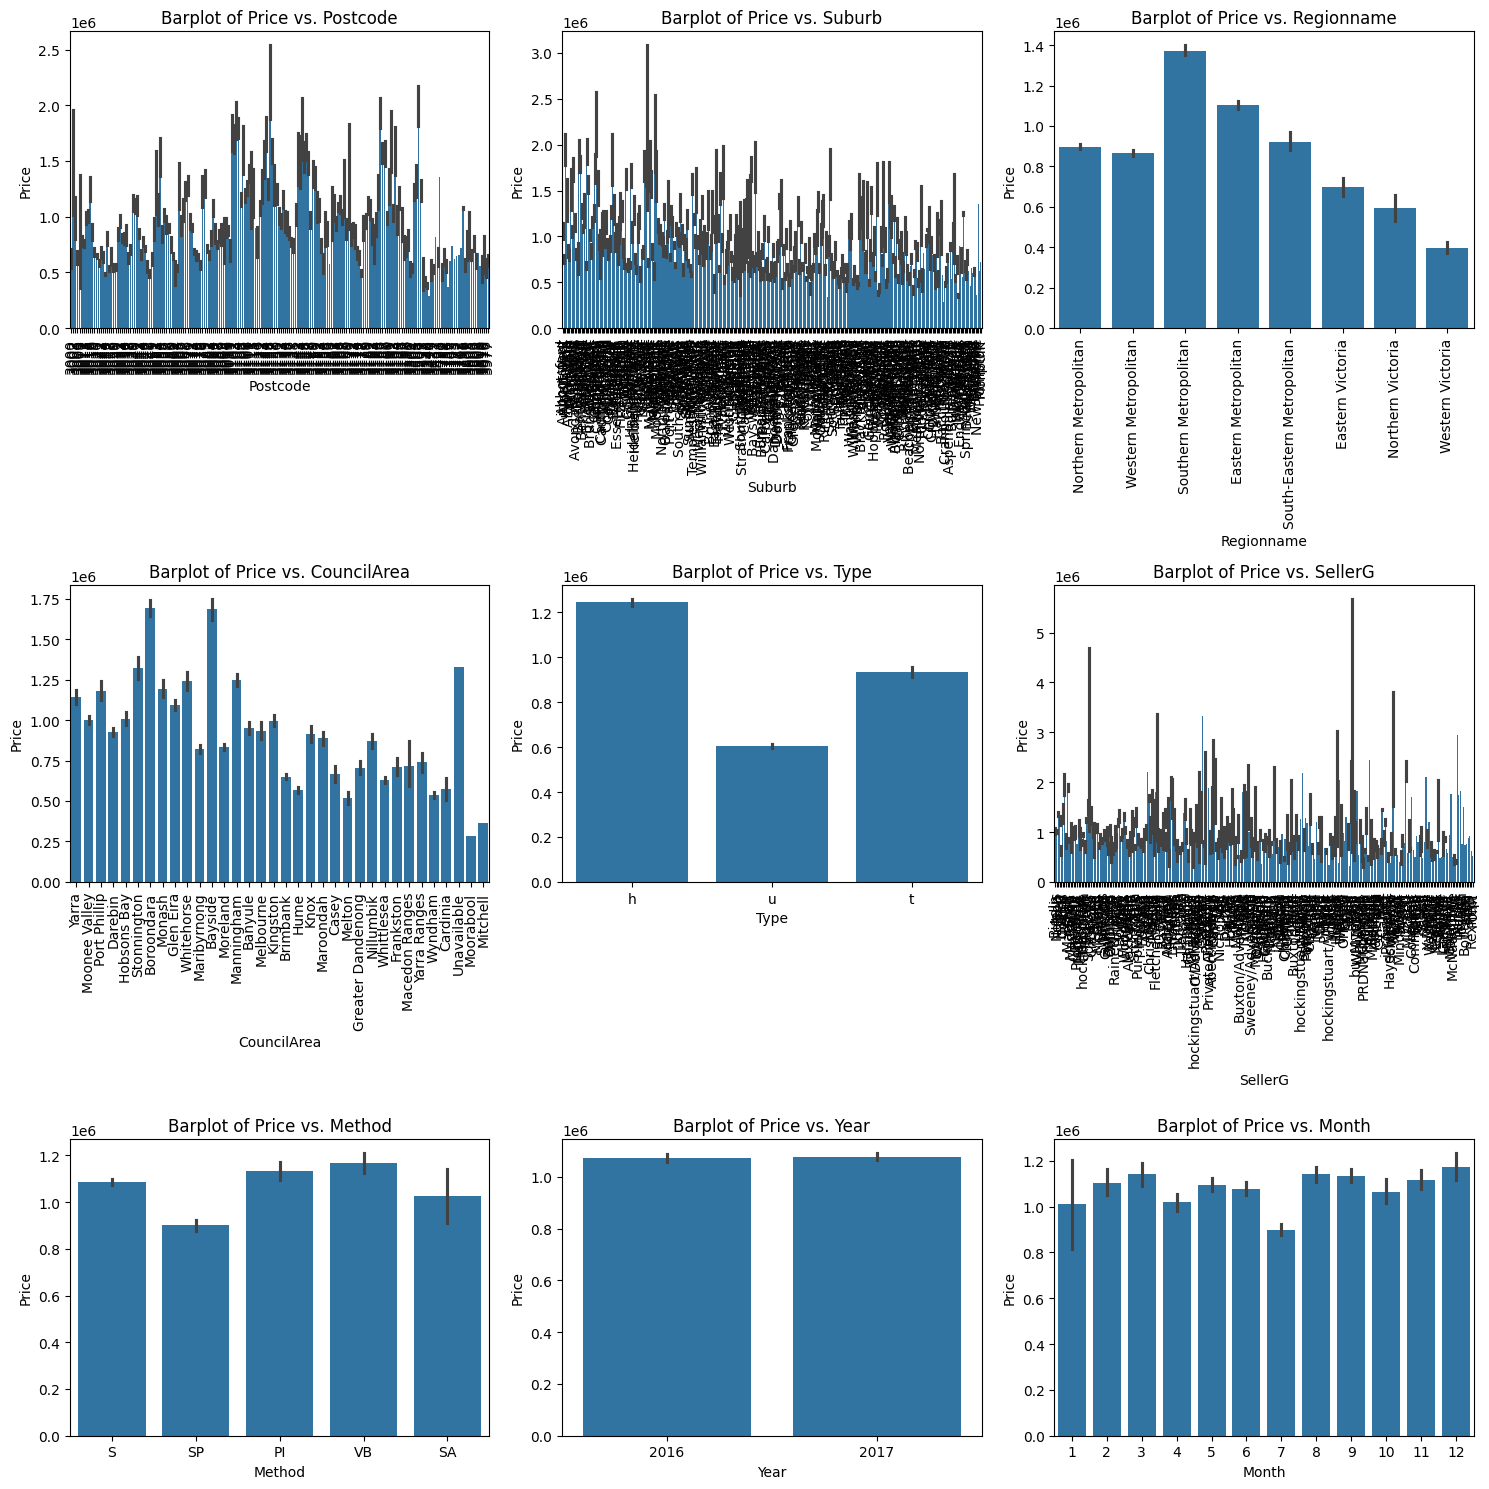

In [12]:
# Display bar plots for categorical columns in 'melb_data' configured in a 3x3 grid layout.
plot_utils.plot_bar(data=melb_data, column_list=cat_columns, rows=3, cols=3)

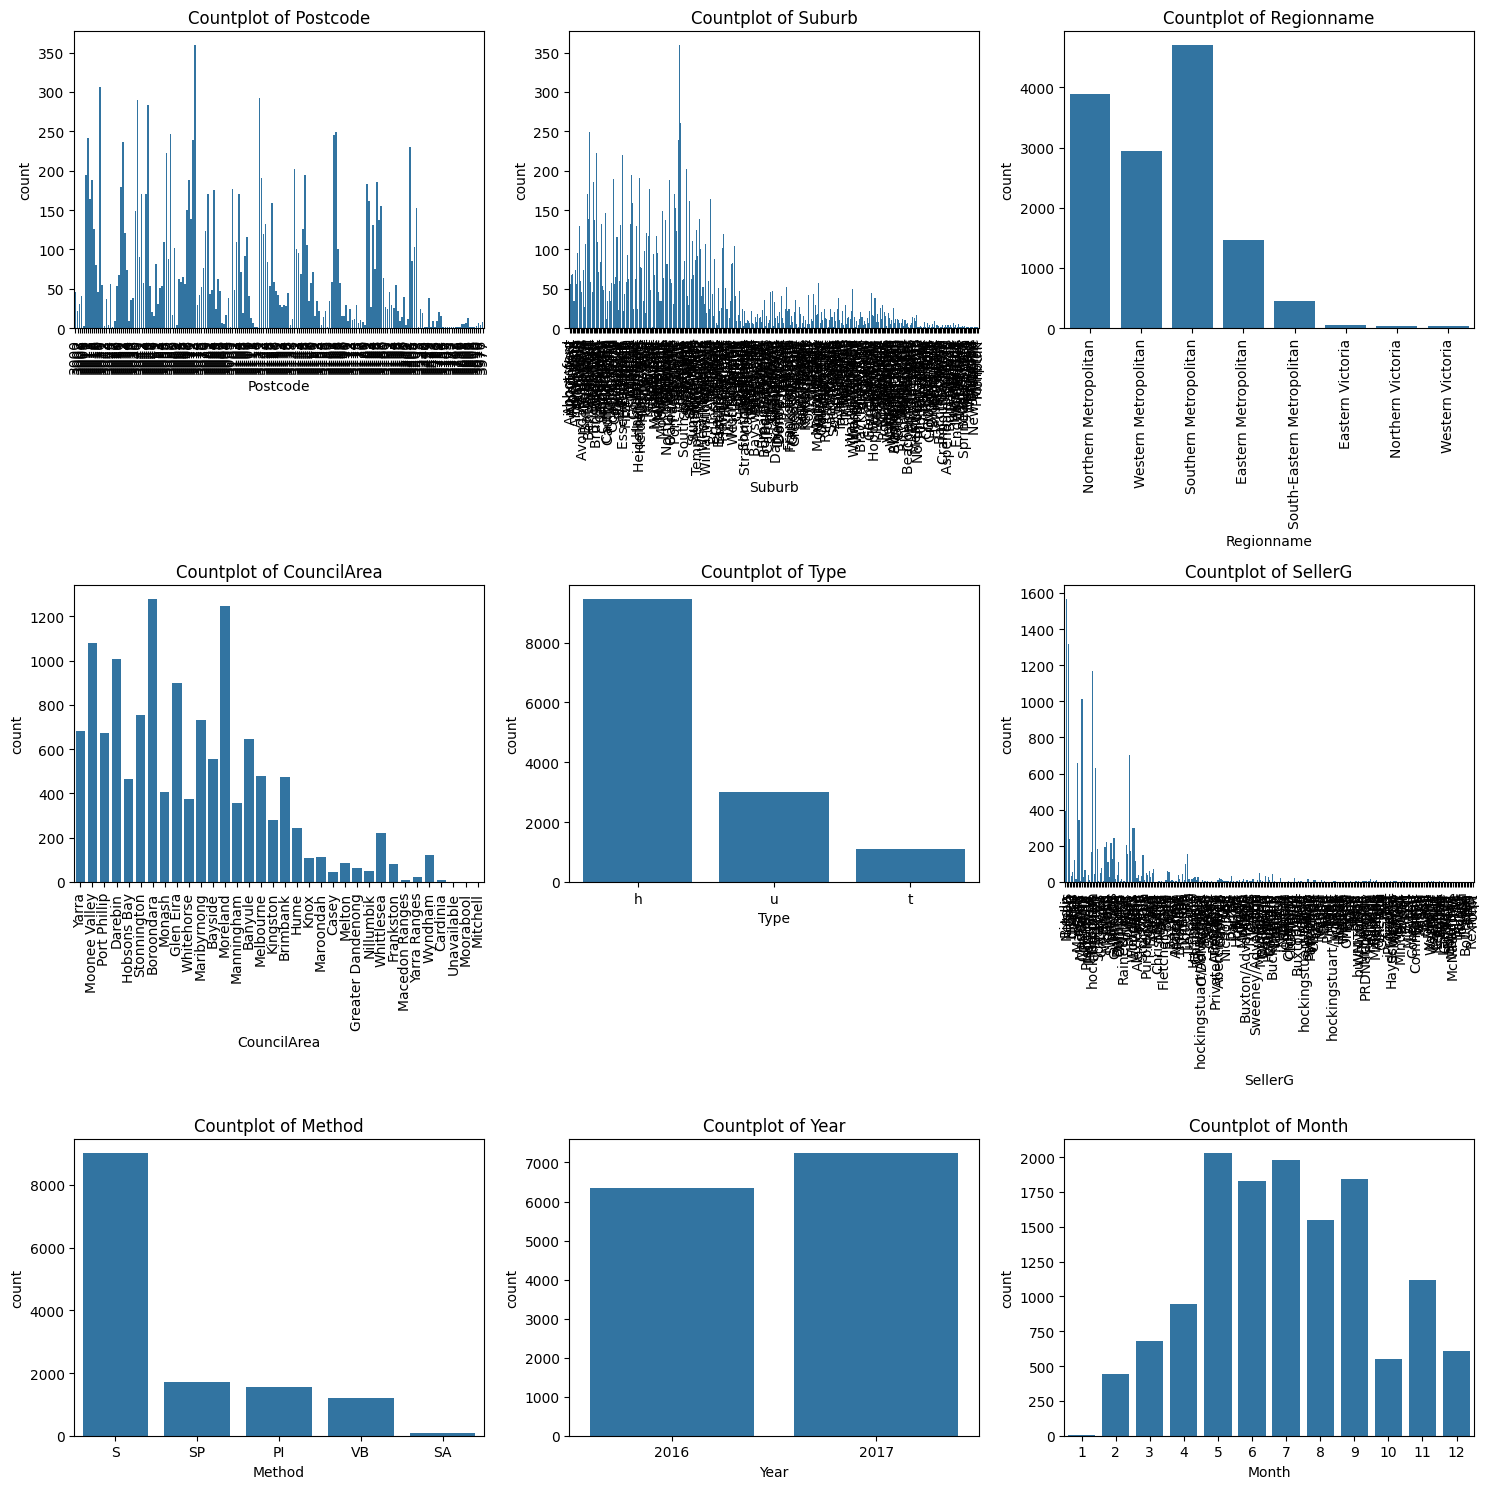

In [13]:
# Plot count plots for categorical columns in 'melb_data', structured within a 3x3 grid.
plot_utils.plot_count(data=melb_data, column_list=cat_columns, rows=3, cols=3)

In [ ]:
# Assess skewness of quantitative variables
print(melb_data[quan_columns].skew())

In [ ]:
# Visualize pair-wise relationships to identify potential correlations and trends
sns.pairplot(data=melb_data[quan_columns])
plt.show()  # Display the pairplot

In [ ]:
# Display correlation matrix to assess linear relationships between variables
correlation_matrix = melb_data[quan_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [22]:
# List of combinations of categorical columns taken two at a time
cat_comb = list(combinations(cat_columns, 2))

for pair in cat_comb:
    # Create a contingency table for the current pair of categorical columns
    table = pd.crosstab(melb_data[pair[0]], melb_data[pair[1]])

    # Perform the chi-square test on the contingency table
    chi2_stat, p_value, dof, expected = chi2_contingency(table)

    # Print the pair, Chi-square statistic, and p-value
    print(f"Pair: {pair}, Chi2 Statistic: {chi2_stat}, p-value: {p_value}")

Pair: ('Postcode', 'Suburb'), Chi2 Statistic: 2675063.0, p-value: 0.0
Pair: ('Postcode', 'Regionname'), Chi2 Statistic: 88153.65837777551, p-value: 0.0
Pair: ('Postcode', 'CouncilArea'), Chi2 Statistic: 407970.41585117904, p-value: 0.0
Pair: ('Postcode', 'Type'), Chi2 Statistic: 2988.770419707808, p-value: 0.0
Pair: ('Postcode', 'SellerG'), Chi2 Statistic: 256309.01983602246, p-value: 0.0
Pair: ('Postcode', 'Method'), Chi2 Statistic: 1706.5919826032207, p-value: 9.835322725940078e-70
Pair: ('Postcode', 'Year'), Chi2 Statistic: 2194.239294883126, p-value: 0.0
Pair: ('Postcode', 'Month'), Chi2 Statistic: 3740.8232580359618, p-value: 2.3795938396483005e-87
Pair: ('Suburb', 'Regionname'), Chi2 Statistic: 95053.0, p-value: 0.0
Pair: ('Suburb', 'CouncilArea'), Chi2 Statistic: 422899.6461877214, p-value: 0.0
Pair: ('Suburb', 'Type'), Chi2 Statistic: 3362.272645648297, p-value: 0.0
Pair: ('Suburb', 'SellerG'), Chi2 Statistic: 320854.0950166662, p-value: 0.0
Pair: ('Suburb', 'Method'), Chi2 Sta

In [ ]:
# Display descriptive statistics to summarize central tendency, dispersion, and shape
print(melb_data.describe())